In [0]:
!git clone https://github.com/rafiuddinkhan/Yolo-Training-GoogleColab.git

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!tar zxvf "/content/cars_train.tgz"
!tar zxvf "/content/cars_test.tgz"

Streaming output truncated to the last 5000 lines.
cars_test/03043.jpg
cars_test/03044.jpg
cars_test/03045.jpg
cars_test/03046.jpg
cars_test/03047.jpg
cars_test/03048.jpg
cars_test/03049.jpg
cars_test/03050.jpg
cars_test/03051.jpg
cars_test/03052.jpg
cars_test/03053.jpg
cars_test/03054.jpg
cars_test/03055.jpg
cars_test/03056.jpg
cars_test/03057.jpg
cars_test/03058.jpg
cars_test/03059.jpg
cars_test/03060.jpg
cars_test/03061.jpg
cars_test/03062.jpg
cars_test/03063.jpg
cars_test/03064.jpg
cars_test/03065.jpg
cars_test/03066.jpg
cars_test/03067.jpg
cars_test/03068.jpg
cars_test/03069.jpg
cars_test/03070.jpg
cars_test/03071.jpg
cars_test/03072.jpg
cars_test/03073.jpg
cars_test/03074.jpg
cars_test/03075.jpg
cars_test/03076.jpg
cars_test/03077.jpg
cars_test/03078.jpg
cars_test/03079.jpg
cars_test/03080.jpg
cars_test/03081.jpg
cars_test/03082.jpg
cars_test/03083.jpg
cars_test/03084.jpg
cars_test/03085.jpg
cars_test/03086.jpg
cars_test/03087.jpg
cars_test/03088.jpg
cars_test/03089.jpg
cars_test

In [0]:
import cv2
import json
import csv
import numpy as np
import pandas as pd
import scipy.io
import numpy as np

cars_meta = scipy.io.loadmat("/content/devkit/cars_meta.mat")
test_anno = scipy.io.loadmat("/content/devkit/cars_test_annos.mat")
train_anno = scipy.io.loadmat("/content/devkit/cars_train_annos.mat")

cars_meta = {k:v for k, v in cars_meta.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in cars_meta.items()})
data.to_json("/content/devkit/cars_meta.json")

train_anno = {k:v for k, v in train_anno.items() if k[0] != '_'}
data1 = pd.DataFrame({k: pd.Series(v[0]) for k, v in train_anno.items()})
data1.to_json("/content/devkit/cars_train_anno.json")

test_anno = {k:v for k, v in train_anno.items() if k[0] != '_'}
data1 = pd.DataFrame({k: pd.Series(v[0]) for k, v in test_anno.items()})
data1.to_json("/content/devkit/cars_test_anno.json")

In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!ls
import sys
sys.path.insert(1, './content/cars/')
%cd /content/cars
!pwd
!ls -l

car_devkit.tgz	cars  cars_test.tgz  cars_train.tgz  devkit  drive  sample_data
/content/cars
/content/cars
total 31808
-rw-r--r-- 1 root  root      7322 Feb 16 06:55 cars_meta.json
drwxr-xr-x 2 10905 users   249856 Dec 14  2013 cars_test
drwxr-xr-x 2 10905 users   249856 Dec 14  2013 cars_train
-rw-r--r-- 1 root  root    495873 Feb 16 06:55 cars_train_anno.json
-rw------- 1 root  root       115 Feb 16 06:34 obj.data
-rw------- 1 root  root         3 Feb 13 10:18 obj.name
-rw------- 1 root  root    281433 Feb 13 10:19 test.txt
-rw------- 1 root  root    293182 Feb 13 10:19 train.txt
-rw------- 1 root  root  30973396 Feb 10 08:47 yolov3-tiny.conv.15
-rw------- 1 root  root      2125 Feb 13 10:27 yolov3-tiny-obj.cfg


In [0]:
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 12454 (delta 1), reused 1 (delta 0), pack-reused 12449
Receiving objects: 100% (12454/12454), 11.40 MiB | 22.28 MiB/s, done.
Resolving deltas: 100% (8498/8498), done.


In [0]:
!ls -l

total 31812
-rw-r--r--  1 root  root      7322 Feb 16 06:55 cars_meta.json
drwxr-xr-x  2 10905 users   249856 Dec 14  2013 cars_test
drwxr-xr-x  2 10905 users   249856 Dec 14  2013 cars_train
-rw-r--r--  1 root  root    495873 Feb 16 06:55 cars_train_anno.json
drwxr-xr-x 13 root  root      4096 Feb 16 06:56 darknet
-rw-------  1 root  root       115 Feb 16 06:34 obj.data
-rw-------  1 root  root         3 Feb 13 10:18 obj.name
-rw-------  1 root  root    281433 Feb 13 10:19 test.txt
-rw-------  1 root  root    293182 Feb 13 10:19 train.txt
-rw-------  1 root  root  30973396 Feb 10 08:47 yolov3-tiny.conv.15
-rw-------  1 root  root      2125 Feb 13 10:27 yolov3-tiny-obj.cfg


In [0]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
libavcodec-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libswscale-dev set to manually installed.
The following package

In [0]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [0]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [0]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 25 not upgraded.
Need to get 6,721 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.1 [49.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.1 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64

In [0]:
#Now let's get some YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

darknet  drive	sample_data
--2020-02-16 19:53:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  67.1MB/s    in 3.7s    

2020-02-16 19:53:22 (63.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
#Now here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' ./darknet/Makefile
!sed -i 's/GPU=0/GPU=1/g' ./darknet/Makefile

darknet  drive	sample_data  yolov3.weights


In [0]:
!ls
%cd ../
!ls

cars_meta.json	cars_train_anno.json  obj.name	 yolov3-tiny.conv.15
cars_test	darknet		      test.txt	 yolov3-tiny-obj.cfg
cars_train	obj.data	      train.txt  yolov3.weights
/content
car_devkit.tgz	cars  cars_test.tgz  cars_train.tgz  devkit  drive  sample_data


In [0]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-bas

In [0]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

94 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2020-02-16 19:54:17--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?Xt8VVUiSCXDvV9DOCVvC9lMVXLuGUgrmRHLdvwAYH04Wgu-sCs1gnq3jeRU4rCIVFuZPsznxscJuuW2QrLfhk3nLMHqp1sBOlBrcbaVAVcOswlqbtYeRCdAcVQdv7Poc32C_al6U_WkHnsZD4lIWosKZ5p5yNRA3LIUrrzelLTpLoXmViSzvyjeKYsgE9Gi5L49MsIYzRdW-hk7yb5PC0PxnLw [following]
--2020-02-16 19:54:18--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?Xt8VVUiSCXDvV9DOCVvC9l

In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [0]:
!ls

car_devkit.tgz	cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
cars		devkit
cars_test.tgz	drive
cars_train.tgz	sample_data


In [0]:
%cd ..
#%cd /content
!pwd

/content/darknet
/content/darknet


In [0]:
!ls

car_devkit.tgz	cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
cars		devkit
cars_test.tgz	drive
cars_train.tgz	sample_data


In [0]:
%cd 

[Errno 2] No such file or directory: 'darknet/'
/content/darknet/cars


In [0]:
!ls
!make

3rdparty      cmake		      image_yolov3.sh	     scripts
appveyor.yml  CMakeLists.txt	      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cars	      data		      net_cam_v3.sh
cfg	      image_yolov2.sh	      README.md
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: At global

In [0]:
!ls
!pwd
%cd ..

Yolo-Training-GoogleColab      yolov3-tiny.conv.15
Yolo-Training-GoogleColab.zip  yolov3-tiny-obj.cfg
/content/darknet/cars
/content/darknet


In [0]:
!unzip Yolo-Training-GoogleColab.zip

Archive:  Yolo-Training-GoogleColab.zip
   creating: Yolo-Training-GoogleColab/anchors_calculation/
  inflating: Yolo-Training-GoogleColab/anchors_calculation/anchors.py  
   creating: Yolo-Training-GoogleColab/anchors_calculation/anchors/
  inflating: Yolo-Training-GoogleColab/anchors_calculation/anchors/anchors6.txt  
   creating: Yolo-Training-GoogleColab/data/
  inflating: Yolo-Training-GoogleColab/data/00001.jpg  
  inflating: Yolo-Training-GoogleColab/data/00001.txt  
  inflating: Yolo-Training-GoogleColab/data/00002.jpg  
  inflating: Yolo-Training-GoogleColab/data/00002.txt  
  inflating: Yolo-Training-GoogleColab/data/00003.jpg  
  inflating: Yolo-Training-GoogleColab/data/00003.txt  
  inflating: Yolo-Training-GoogleColab/data/00004.jpg  
  inflating: Yolo-Training-GoogleColab/data/00004.txt  
  inflating: Yolo-Training-GoogleColab/data/00005.jpg  
 extracting: Yolo-Training-GoogleColab/data/00005.txt  
  inflating: Yolo-Training-GoogleColab/data/00006.jpg  
  inflating: Yolo

In [0]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/darknet/cars/Yolo-Training-GoogleColab/data/00010.jpg

3rdparty      cfg		      image_yolov2.sh	     predictions.jpg
appveyor.yml  cmake		      image_yolov3.sh	     README.md
backup	      CMakeLists.txt	      include		     results
bad.list      darknet		      json_mjpeg_streams.sh  scripts
build	      DarknetConfig.cmake.in  LICENSE		     src
build.ps1     darknet.py	      Makefile		     video_v2.sh
build.sh      darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
cars	      data		      obj		     yolov3.weights
 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut

In [0]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

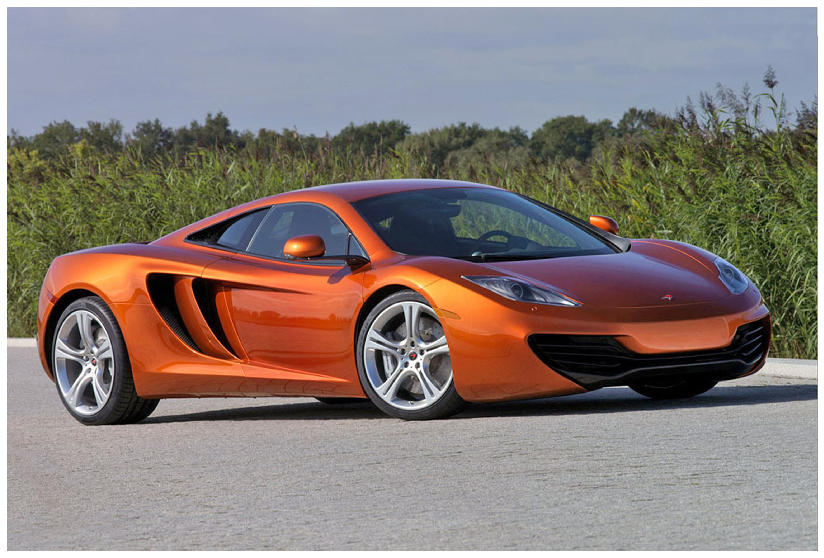

In [0]:
imShow('/content/darknet/cars/Yolo-Training-GoogleColab/data/00301.jpg')

In [0]:
!ls

3rdparty      cfg		      image_yolov2.sh	     predictions.jpg
appveyor.yml  cmake		      image_yolov3.sh	     README.md
backup	      CMakeLists.txt	      include		     results
bad.list      darknet		      json_mjpeg_streams.sh  scripts
build	      DarknetConfig.cmake.in  LICENSE		     src
build.ps1     darknet.py	      Makefile		     video_v2.sh
build.sh      darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
cars	      data		      obj		     yolov3.weights


In [0]:
#!mv /content/cars/ .
!mv ..content/cars/ .
#!mv --help

mv: cannot stat '..content/cars/': No such file or directory


In [0]:
#%cd darknet
%cd ..

/content/darknet


In [0]:
!mv ../content/darknet/ .

mv: cannot stat '../content/darknet/': No such file or directory


In [0]:
#!./darknet detector train cars_train/cars_train_anno.json cars/yolov3-tiny.conv.15 -dont_show
!./darknet detector train cars/Yolo-Training-GoogleColab/obj.data cars/Yolo-Training-GoogleColab/yolov3-tiny-obj.cfg cars/Yolo-Training-GoogleColab/yolov3-tiny.conv.15 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.000002, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 

 3555: 0.779928, 0.820488 avg loss, 0.001000 rate, 2.017050 seconds, 227520 images
Loaded: 0.000055 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.647186, GIOU: 0.640191), Class: 0.996738, Obj: 0.562864, No Obj: 0.003188, .5R: 0.854167, .75R: 0.312500, count: 48, class_loss = 0.520345, iou_loss = 0.589061, total_loss = 1.109406 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.000002, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.634544, GIOU: 0.620889), Class: 0.996685, Obj: 0.48105

In [0]:
!ls
!pwd

3rdparty      chart.png			 image_yolov2.sh	README.md
appveyor.yml  chart_yolov3-tiny-obj.png  image_yolov3.sh	results
backup	      cmake			 include		scripts
bad.list      CMakeLists.txt		 json_mjpeg_streams.sh	src
build	      darknet			 LICENSE		video_v2.sh
build.ps1     DarknetConfig.cmake.in	 Makefile		video_yolov3.sh
build.sh      darknet.py		 net_cam_v3.sh		yolov3.weights
cars	      darknet_video.py		 obj
cfg	      data			 predictions.jpg
/content/darknet


In [0]:
!./darknet detector test cars/Yolo-Training-GoogleColab/obj.data cars/Yolo-Training-GoogleColab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights cars/Yolo-Training-GoogleColab/test.jpg -i 0 -thresh 0.5

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
 

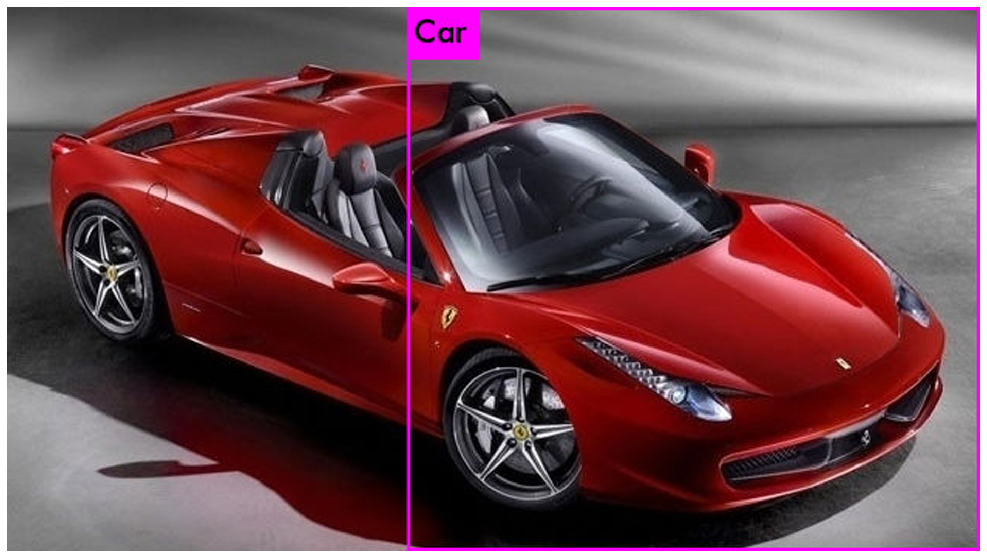

In [0]:
imShow('predictions.jpg')

In [0]:
!pwd

In [1]:
!./darknet detector demo cars/Yolo-Training-GoogleColab/obj.data cars/Yolo-Training-GoogleColab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights  -dont_show ../PorscheTaycan.mp4 -out_filename ../Yolo_cars.mp4

/bin/bash: ./darknet: No such file or directory


In [0]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights  -dont_show ../madara_vs_shinobi_alliance_madara_revived_english_sub_w518c7_Ap1g_360p.mp4 -i 0 -out_filename ../yolo_madara.mp4

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
Couldn't open file: data_for_colab/obj.data
